In [2]:
import numpy as np
import itk
import itkwidgets
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc
sns.set_palette('colorblind')
sns.set_context('paper', font_scale=1.5)
sns.set_style('white')
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [3]:
img = np.load('../matrices/NORMALIZED-RP-STACK.npy')

## 2D Static Plots

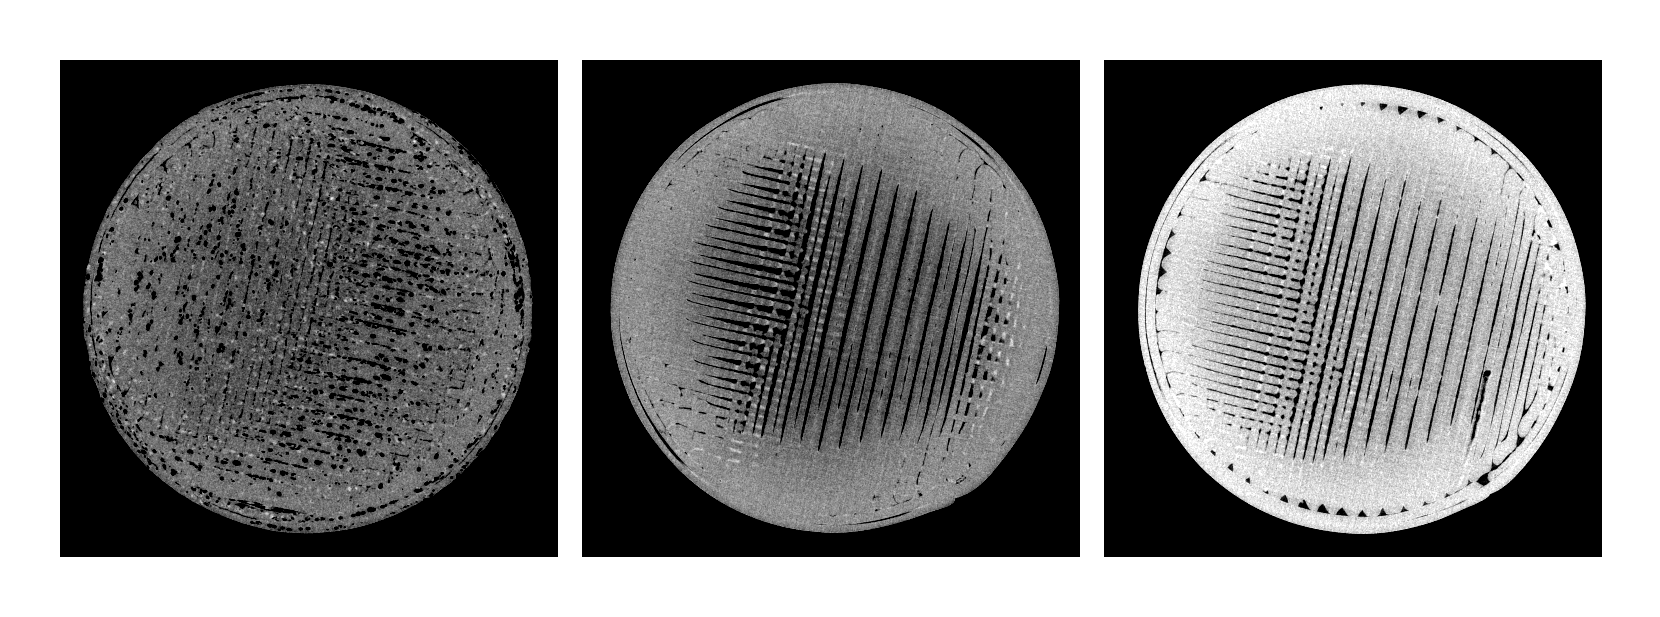

In [18]:
# Create slices of the object within each material region.
# This is used for analyzing the diameter, as it may be different between materials.

fig, axs = plt.subplots(1, 3)
fig.set_size_inches(3,9)
fig.set_dpi(600)
#fig.suptitle("Slices of Each Material")

axs[0].imshow(img[:,:,200], cmap='gray', vmin=120, vmax=225)
axs[1].imshow(img[:,:,900], cmap='gray', vmin=120, vmax=225)
axs[2].imshow(img[:,:,1600], cmap='gray', vmin=120, vmax=225)

for ax in fig.get_axes():
    #ax.label_outer()
    ax.axis(False)
    

fig.tight_layout()
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()

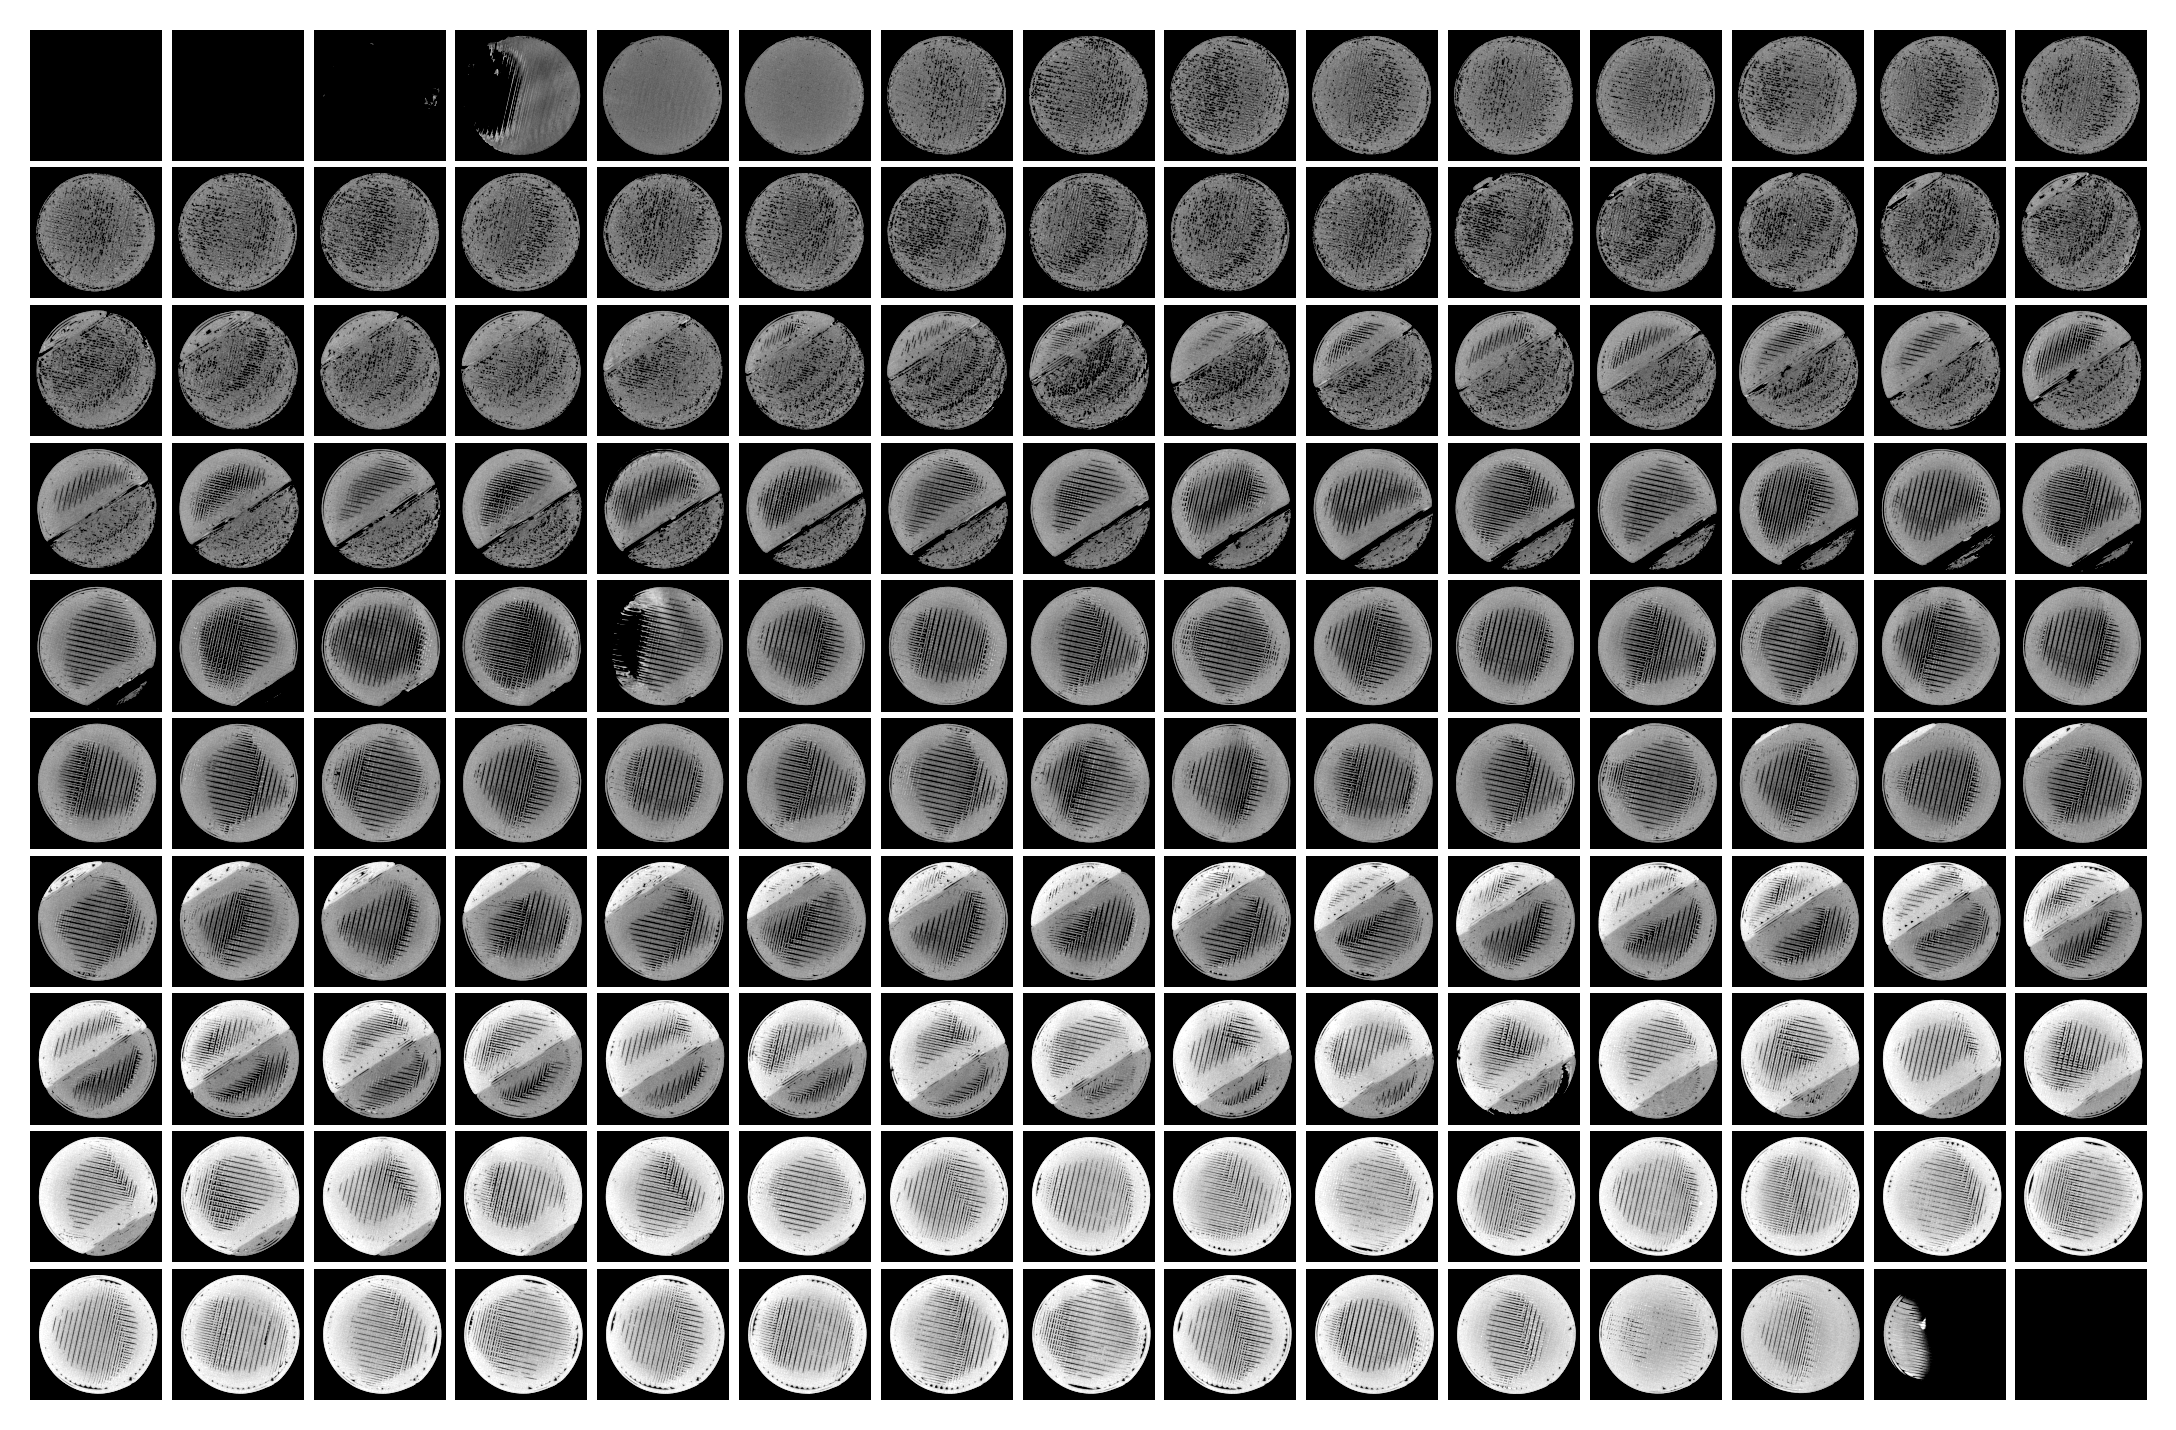

In [7]:
x,y=10,15
fig, axs = plt.subplots(x,y)
fig.set_size_inches(y/2, x/2)
fig.set_dpi(300)
vals = np.linspace(0, 1788, x*y, dtype=np.uint16)
n = 0
for i in range(x):
    for j in range(y):
        val = vals[n]
        axs[i,j].imshow(img[:,:,val], cmap='gray', vmin=110, vmax=220)
        axs[i,j].axis(False)
        n += 1

fig.tight_layout()
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()

In [19]:
# Create histograms to visualize the spread of the dataset.

norm_img = np.load("../matrices/NORMALIZED-RP-STACK.npy")
img = np.load("../matrices/2024_FULL-STACK.npy")

In [20]:
fp_counts, fp_bins = np.histogram(img.reshape(-1,1), bins=256)
rp_counts, rp_bins = np.histogram(norm_img.reshape(-1,1), bins=256)

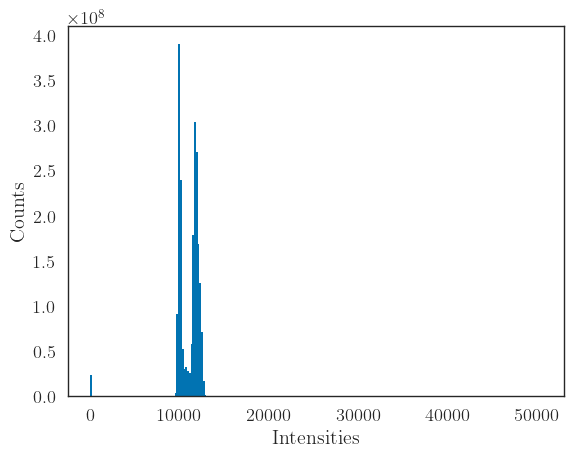

In [21]:
plt.stairs(fp_counts, fp_bins, fill=True)
# plt.title("Intensity Histogram of Single-Precision Float Dataset")
plt.ylabel("Counts")
plt.xlabel("Intensities")
plt.show()

[]

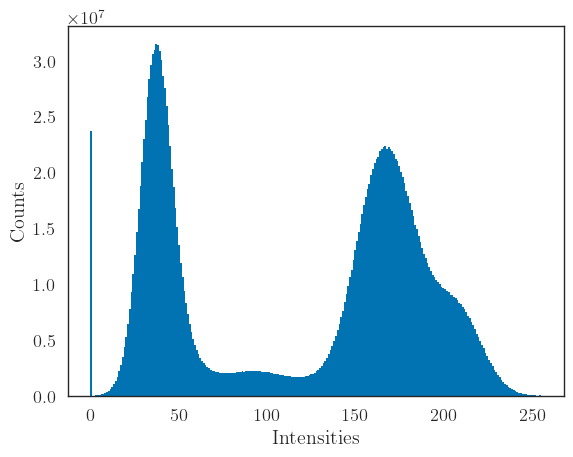

In [22]:
plt.stairs(rp_counts, rp_bins, fill=True)
#plt.title("Intensity Histogram of 8-bit Integer Normalized Dataset")
plt.ylabel("Counts")
plt.xlabel("Intensities")
plt.plot()

FigureCanvasAgg is non-interactive, and thus cannot be shown


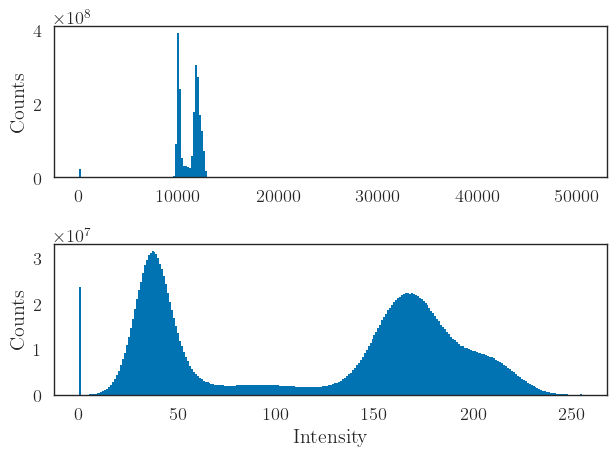

In [30]:
fig, axs = plt.subplots(2,1)
axs[0].stairs(fp_counts, fp_bins, fill=True)
axs[0].set_ylabel("Counts")

axs[1].stairs(rp_counts, rp_bins, fill=True)
axs[1].set_xlabel("Intensity")
axs[1].set_ylabel("Counts")

fig.tight_layout()
fig.show()

## Slice Animation

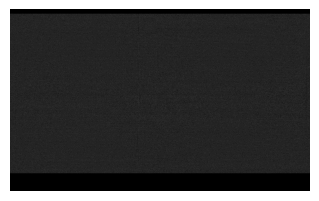

In [24]:
import matplotlib.animation as anim
img = np.load("./matrices/DOWNSAMPLED-RP-STACK.npy")
fig, ax = plt.subplots()
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
fig.set_size_inches(3, 542/298, forward=True)

im0 = ax.imshow(img[0,:,:], animated=True, vmin=0, vmax=255, cmap='gray')

def update(i):
    im0.set_array(img[i,:,:])
    return im0,

anim_fig = anim.FuncAnimation(fig, update, frames=542, interval = 16.667, blit=True, repeat_delay=100,)
plt.axis(False)
plt.show()

anim_fig.save("testgif2.gif")

## 3D Interactive Visualization

In [8]:
# Run this cell if you want to use 3D visualization! This is required for operating with the ITK package.
# This will feel super low quality if you use the Normalized matrix import!

# If you want higher quality 3d view, uncomment the next line.
# img = np.load('./2024_FULL-STACK.npy')
volume = itk.GetImageFromArray(img)

In [9]:
# Display the stack in 3D. It will be rotated by 90 degrees, oops.
# You can modify this method call to automatically set the min and max to values that look clean.
# I suggest 10000 and 13000 for this object.
itkwidgets.view(volume)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageUC3; pr…